# Plots and calculations for ICRC 2025

In [2]:
from pathlib import Path

from matplotlib import pyplot as plt

from bayesian_analysis import FitConfig
from cr_knee_fit import experiments, plotting
from cr_knee_fit.elements import Element
from cr_knee_fit.fit_data import Data, DataConfig
from cr_knee_fit.utils import E_GEV_LABEL, LN_A_LABEL, legend_artist_line, legend_with_added_items

In [3]:
dc_all = DataConfig(
    experiments_elements=list(experiments.ICRC25),
    experiments_all_particle=experiments.ICRC25,
    experiments_lnA=experiments.ICRC25,
)

In [4]:
dc_direct = DataConfig(
    experiments_elements=list(experiments.DIRECT),
    experiments_all_particle=[],
    experiments_lnA=[],
    elements_R_bounds=(500, 1e8),
)

data_direct = Data.load(dc_direct)
data_le = Data.load(
    DataConfig(
        experiments_elements=list(experiments.DIRECT),
        experiments_all_particle=[],
        experiments_lnA=[],
        elements_R_bounds=(1, 500),
    )
)

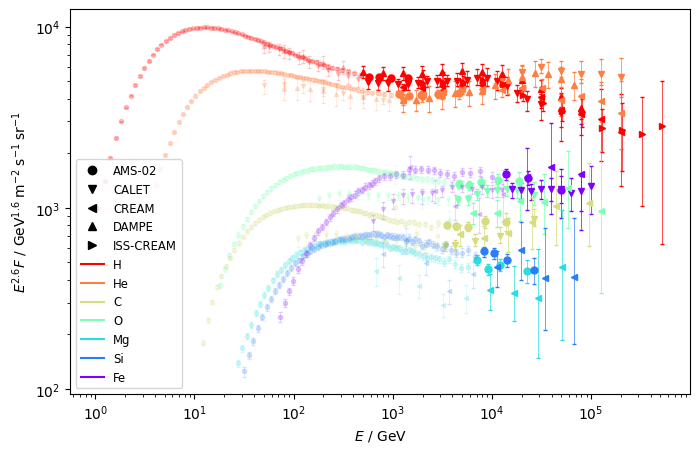

In [5]:
fig, ax = plt.subplots(figsize=(8, 5))

scale = 2.6

for exp, ps in data_direct.element_spectra.items():
    for p, s in ps.items():
        s.plot(scale=scale, ax=ax, add_label=False, is_fitted=True, marker_size=5.0)
for exp, ps in data_le.element_spectra.items():
    for p, s in ps.items():
        s.plot(scale=scale, ax=ax, add_label=False, is_fitted=False)


ax.set_xscale("log")
ax.set_yscale("log")
legend_with_added_items(
    ax,
    [
        (exp.legend_artist(is_fitted=True), exp.name)
        for exp in sorted(data_direct.experiments(spectra_only=True))
    ]
    + [(legend_artist_line(element.color), element.name) for element in Element.regular()],
    fontsize="small",
)

plt.show()

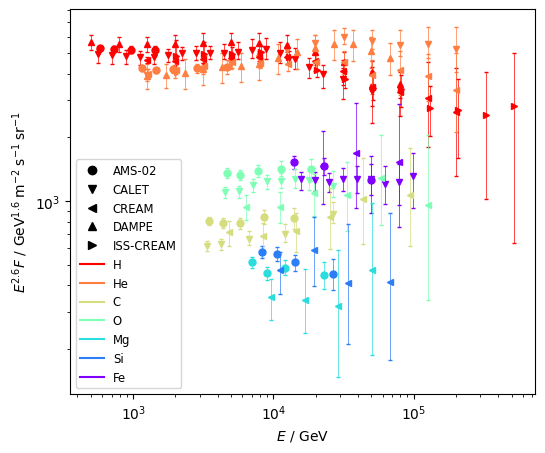

In [6]:
fig, ax = plt.subplots(figsize=(6, 5))

scale = 2.6

for exp, ps in data_direct.element_spectra.items():
    for p, s in ps.items():
        s.plot(scale=scale, ax=ax, add_label=False, is_fitted=True, marker_size=5.0)

ax.set_xscale("log")
ax.set_yscale("log")
legend_with_added_items(
    ax,
    [
        (exp.legend_artist(is_fitted=True), exp.name)
        for exp in sorted(data_direct.experiments(spectra_only=True))
    ]
    + [(legend_artist_line(element.color), element.name) for element in Element.regular()],
    fontsize="small",
)

plt.show()

In [7]:
data_grapes = Data.load(DataConfig(experiments_elements=[experiments.grapes]))

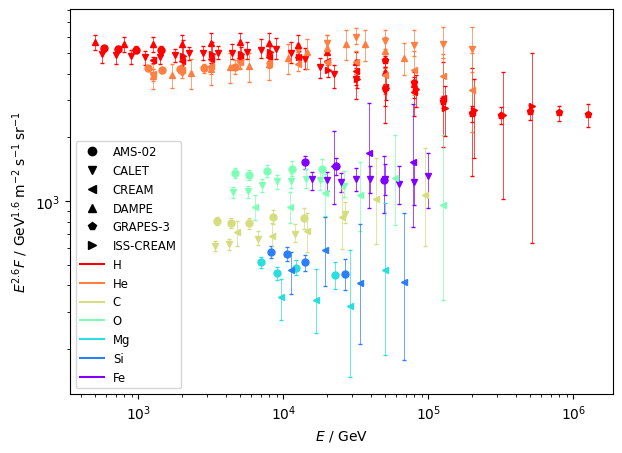

In [8]:
fig, ax = plt.subplots(figsize=(7, 5))

scale = 2.6

for exp, ps in data_direct.element_spectra.items():
    for p, s in ps.items():
        s.plot(scale=scale, ax=ax, add_label=False, is_fitted=True, marker_size=5.0)
for exp, ps in data_grapes.element_spectra.items():
    for p, s in ps.items():
        s.plot(scale=scale, ax=ax, add_label=False, is_fitted=True, marker_size=5.0)

ax.set_xscale("log")
ax.set_yscale("log")
legend_with_added_items(
    ax,
    [
        (exp.legend_artist(is_fitted=True), exp.name)
        for exp in sorted(
            data_direct.experiments(spectra_only=True) + data_grapes.experiments(spectra_only=True)
        )
    ]
    + [(legend_artist_line(element.color), element.name) for element in Element.regular()],
    fontsize="small",
)

plt.show()

In [9]:
lhaaso = experiments.lhaaso_qgsjet
data_lhaaso = Data.load(
    DataConfig(
        experiments_elements=[lhaaso], experiments_all_particle=[lhaaso], experiments_lnA=[lhaaso]
    )
)

In [10]:
data_all = Data.load(
    DataConfig(
        experiments_elements=experiments.DIRECT + [experiments.grapes, lhaaso],
        experiments_all_particle=[experiments.hawc, experiments.grapes, lhaaso],
        experiments_lnA=[lhaaso],
    )
)
data_kascade = Data.load(
    DataConfig(
        experiments_elements=[experiments.kascade_re_qgsjet],
        experiments_all_particle=[experiments.kascade_re_qgsjet],
        experiments_lnA=[experiments.kascade_re_qgsjet],
    )
)

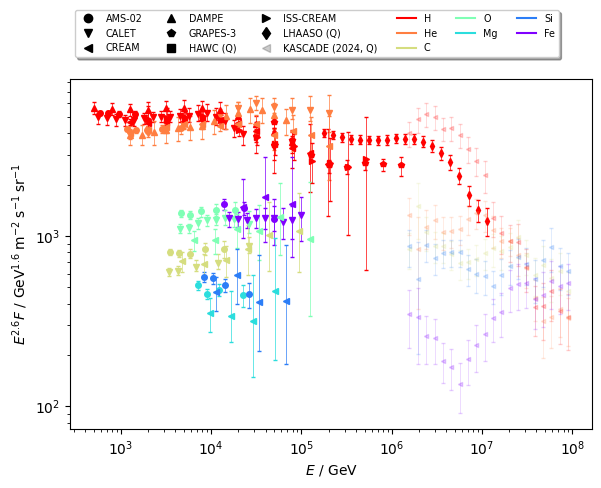

In [11]:
fig, ax = plt.subplots(figsize=(6.2, 5))

scale = 2.6

for exp, ps in data_all.element_spectra.items():
    for p, s in ps.items():
        s.plot(scale=scale, ax=ax, add_label=False, is_fitted=True, marker_size=4.0)
for exp, ps in data_kascade.element_spectra.items():
    for p, s in ps.items():
        s.plot(scale=scale, ax=ax, add_label=False, is_fitted=False)


ax.set_xscale("log")
ax.set_yscale("log")
legend_with_added_items(
    ax,
    [
        (exp.legend_artist(is_fitted=True), exp.name)
        for exp in sorted(data_all.experiments(spectra_only=True))
    ]
    + [
        (exp.legend_artist(is_fitted=False), exp.name)
        for exp in sorted(data_kascade.experiments(spectra_only=True))
    ]
    + [(legend_artist_line(element.color), element.name) for element in Element.regular()],
    fontsize="x-small",
    bbox_to_anchor=(0.00, 1.05, 1.0, 0.0),
    loc="lower left",
    fancybox=True,
    shadow=True,
    ncol=6,
)

fig.tight_layout()
plt.show()

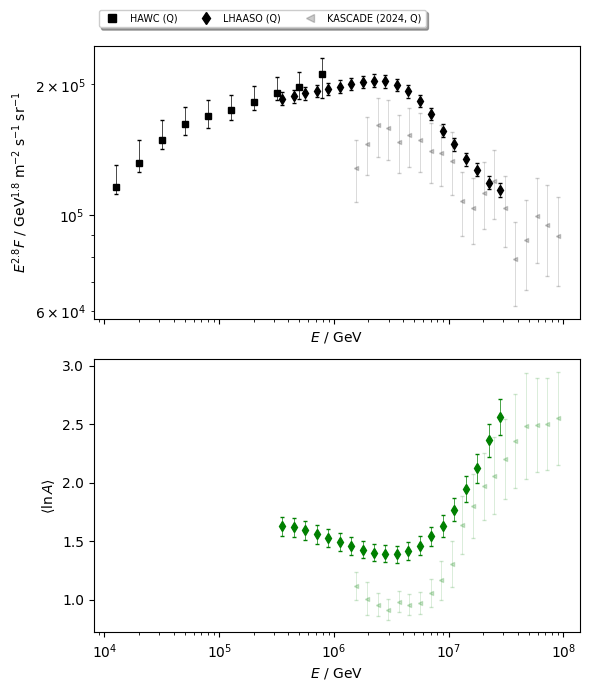

In [12]:
fig, axes = plt.subplots(nrows=2, sharex=True, figsize=(6, 7))

ax_all = axes[0]
ax_lnA = axes[1]

scale = 2.8

for exp, s in data_all.all_particle_spectra.items():
    s.plot(scale=scale, ax=ax_all, add_label=False, is_fitted=True, marker_size=5.0)
for exp, s in data_kascade.all_particle_spectra.items():
    s.plot(scale=scale, ax=ax_all, add_label=False, is_fitted=False)


for exp, s in data_all.lnA.items():
    s.plot(scale=0, color="green", ax=ax_lnA, add_label=False, is_fitted=True, marker_size=5.0)
for exp, s in data_kascade.lnA.items():
    s.plot(scale=0, color="green", ax=ax_lnA, add_label=False, is_fitted=False)


legend_with_added_items(
    ax_all,
    [
        (exp.legend_artist(is_fitted=True), exp.name)
        for exp in sorted(data_all.all_particle_spectra.keys())
    ]
    + [
        (exp.legend_artist(is_fitted=False), exp.name)
        for exp in sorted(data_kascade.all_particle_spectra.keys())
    ],
    fontsize="x-small",
    bbox_to_anchor=(0.00, 1.05, 1.0, 0.0),
    loc="lower left",
    fancybox=True,
    shadow=True,
    ncol=4,
)
ax_all.set_xscale("log")
ax_all.set_yscale("log")
ax_lnA.set_xscale("log")
ax_lnA.set_xlabel(E_GEV_LABEL)
ax_lnA.set_ylabel(LN_A_LABEL)

fig.tight_layout()
plt.show()

# Experimental energy scale uncertainties

(20000.0, np.float64(944349.4041697903))

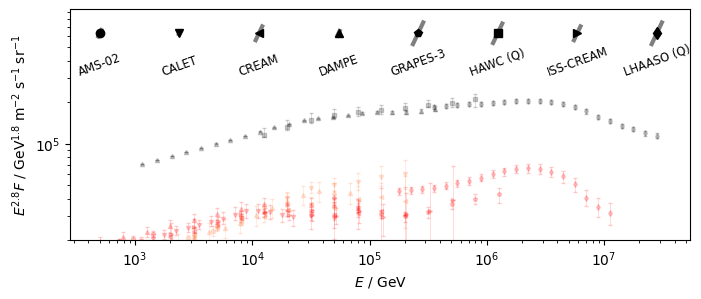

In [13]:
import numpy as np

from cr_knee_fit.inference import energy_scale_lg_uncertainties
from cr_knee_fit.shifts import ExperimentEnergyScaleShifts

data_main = Data.load(
    DataConfig(
        experiments_elements=data_all.experiments(),
        experiments_all_particle=data_all.experiments(),
        experiments_lnA=data_all.experiments(),
        elements=[Element.H, Element.He],
    )
)

scale = 2.8

fig, ax = plt.subplots(figsize=(8, 3))

data_main.plot_spectra(describe=False, scale=scale, is_fitted=False, ax=ax, legend=False)

experiment_list = data_main.experiments(spectra_only=True)
E_grid = np.geomspace(data_main.E_min(), data_main.E_max(), num=len(experiment_list))
y_target = 10 ** (5.8)

sigma_shifts = ExperimentEnergyScaleShifts(lg_shifts=energy_scale_lg_uncertainties)

for exp, E in zip(experiment_list, E_grid):
    F = y_target / E**scale
    f = sigma_shifts.f(exp)
    ax.plot(
        [E / f, E * f],
        [f ** -(scale - 1) * y_target, f ** (scale - 1) * y_target],
        color="black",
        alpha=0.5,
        linewidth=3.0,
    )
    ax.plot([E], y_target, marker=exp.marker, markersize=6.0, color="black")
    ax.text(E, y_target / 2, exp.name, ha="center", rotation=20, fontsize="small")
    # for power in (1, -1):
    #     f = sigma_shifts.f(exp)**power
    #     ax.quiver(
    #         [E], [y_target], [f*E - E], [f**(scale - 1) * y_target - y_target], angles="xy", scale=1.0, scale_units="xy"
    #     )

ax.set_ylim(bottom=2e4)

# Minimal model


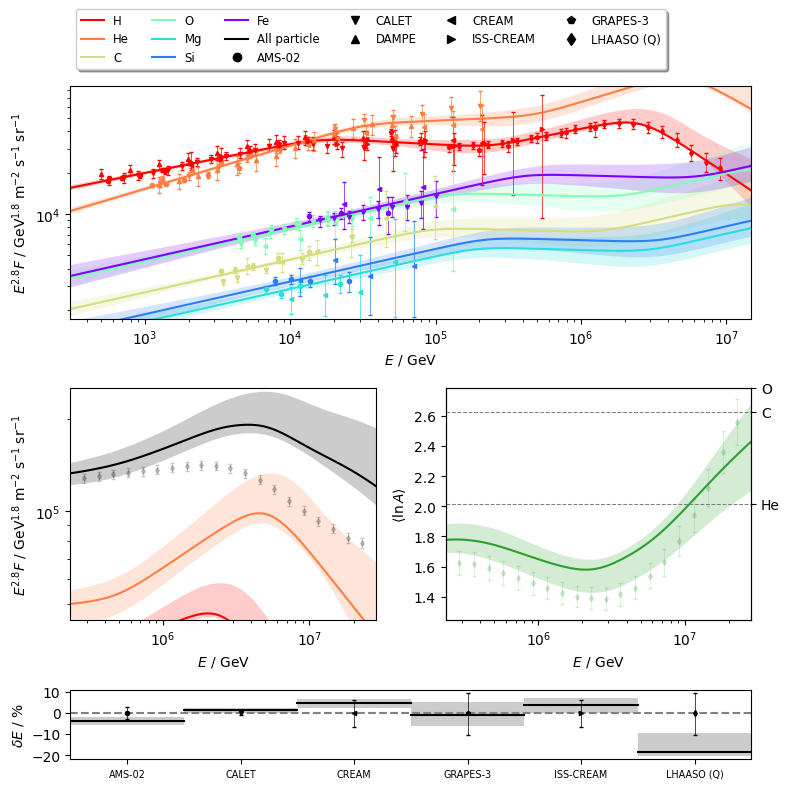

In [14]:
FIT_DIR = Path("out/basic")

fc = FitConfig.model_validate_json((FIT_DIR / "config-dump.json").read_text())
theta_sample = np.loadtxt(FIT_DIR / "theta.txt")
theta_best_fit = np.loadtxt(FIT_DIR / "posterior-ml.txt")

ppc = plotting.PosteriorPlotConfig(
    # contours=True,
    # tricontourf_kwargs_override={"levels": 30},
    band_cl=0.9,
)

fit_data_config = DataConfig(
    experiments_elements=list(
        experiments.DIRECT
        + [
            experiments.grapes,
            experiments.lhaaso_qgsjet,
        ]
    ),
    experiments_all_particle=[],
    experiments_lnA=[],
    elements=Element.regular(),
)
fit_data = Data.load(fit_data_config)

validation_data_config = DataConfig(
    experiments_elements=[],
    experiments_all_particle=[experiments.lhaaso_qgsjet],
    experiments_lnA=[experiments.lhaaso_qgsjet],
    elements=[],
).excluding(fit_data_config)
val_data = Data.load(validation_data_config)

fig, axes = plt.subplot_mosaic(
    [
        ["Elements", "Elements"],
        ["All particle", "lnA"],
        ["Shifts", "Shifts"],
    ],
    figsize=(8, 8),
    height_ratios=[1, 1, 0.3],
)

fig = plotting.plot_everything(
    plots_config=plotting.PlotsConfig(
        validation_data_config=validation_data_config,
        elements=plotting.PosteriorPlotConfig(
            max_margin_around_data=0.1,
        ),
        all_particle=plotting.PosteriorPlotConfig(
            max_margin_around_data=1.0,
        ),
        all_particle_elements_contribution=ppc,
        lnA=ppc,
        energy_shifts=ppc,
    ),
    theta_sample=theta_sample,
    theta_bestfit=theta_best_fit,
    model_config=fc.model,
    spectra_scale=2.8,
    fit_data=fit_data,
    validation_data=val_data,
    axes=axes,
    legend_ncol=6,
)

fig.savefig("export/minimal-model.pdf")

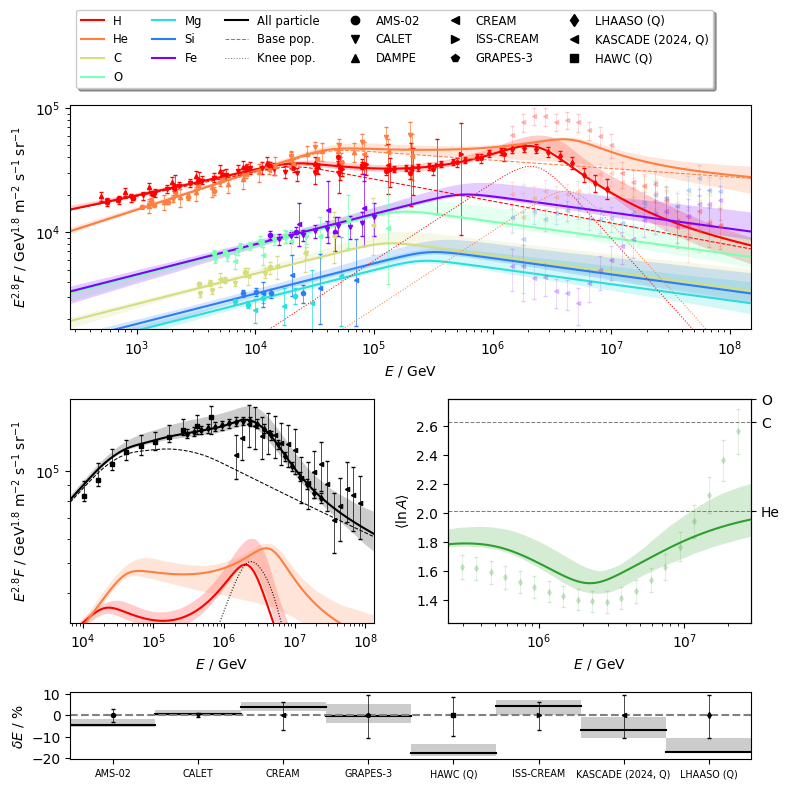

In [22]:
FIT_DIR = Path("out/2pop")

fc = FitConfig.model_validate_json((FIT_DIR / "config-dump.json").read_text())
theta_sample = np.loadtxt(FIT_DIR / "theta.txt")
theta_best_fit = np.loadtxt(FIT_DIR / "posterior-ml.txt")

ppc = plotting.PosteriorPlotConfig(
    # contours=True,
    # tricontourf_kwargs_override={"levels": 30},
    band_cl=0.9,
)

fit_data_config = DataConfig(
    experiments_elements=list(
        experiments.DIRECT
        + [
            experiments.grapes,
            experiments.lhaaso_qgsjet,
        ]
    ),
    experiments_all_particle=[
        experiments.hawc,
        experiments.lhaaso_qgsjet,
        experiments.kascade_re_qgsjet,
    ],
    experiments_lnA=[],
    elements=Element.regular(),
)
fit_data = Data.load(fit_data_config)

validation_data_config = DataConfig(
    experiments_elements=[experiments.kascade_re_qgsjet],
    experiments_all_particle=[experiments.lhaaso_qgsjet],
    experiments_lnA=[experiments.lhaaso_qgsjet],
    elements=Element.regular(),
).excluding(fit_data_config)
val_data = Data.load(validation_data_config)

fig, axes = plt.subplot_mosaic(
    [
        ["Elements", "Elements"],
        ["All particle", "lnA"],
        ["Shifts", "Shifts"],
    ],
    figsize=(8, 8),
    height_ratios=[1, 1, 0.3],
)

fig = plotting.plot_everything(
    plots_config=plotting.PlotsConfig(
        validation_data_config=validation_data_config,
        elements=plotting.PosteriorPlotConfig(
            max_margin_around_data=0.1,
            population_contribs_best_fit=True,
        ),
        all_particle=plotting.PosteriorPlotConfig(
            max_margin_around_data=1.0,
            population_contribs_best_fit=True,
        ),
        all_particle_elements_contribution=ppc,
        lnA=ppc,
        energy_shifts=ppc,
    ),
    theta_sample=theta_sample,
    theta_bestfit=theta_best_fit,
    model_config=fc.model,
    spectra_scale=2.8,
    fit_data=fit_data,
    validation_data=val_data,
    axes=axes,
    legend_ncol=6,
)

fig.savefig("export/modified-2pop-model.pdf")

ExperimentEnergyScaleShifts(lg_shifts={Experiment(name='AMS-02', filename_stem='AMS-02'): np.float64(4.67198814812027), Experiment(name='CALET', filename_stem='CALET'): np.float64(0.3406242795162806), Experiment(name='CREAM', filename_stem='CREAM'): np.float64(-0.017490453928229434), Experiment(name='GRAPES-3', filename_stem='GRAPES'): np.float64(0.004235892838601872), Experiment(name='HAWC (Q)', filename_stem='HAWC_QGSJET-II-04'): np.float64(0.01895277909162428), Experiment(name='ISS-CREAM', filename_stem='ISS-CREAM'): np.float64(0.05224799808908754), Experiment(name='KASCADE (2024, Q)', filename_stem='KASCADE_re_QGSJET-II-04'): np.float64(0.029757476839403767), Experiment(name='LHAASO (Q)', filename_stem='LHAASO_QGSJET-II-04'): np.float64(-0.04662425059286811)})


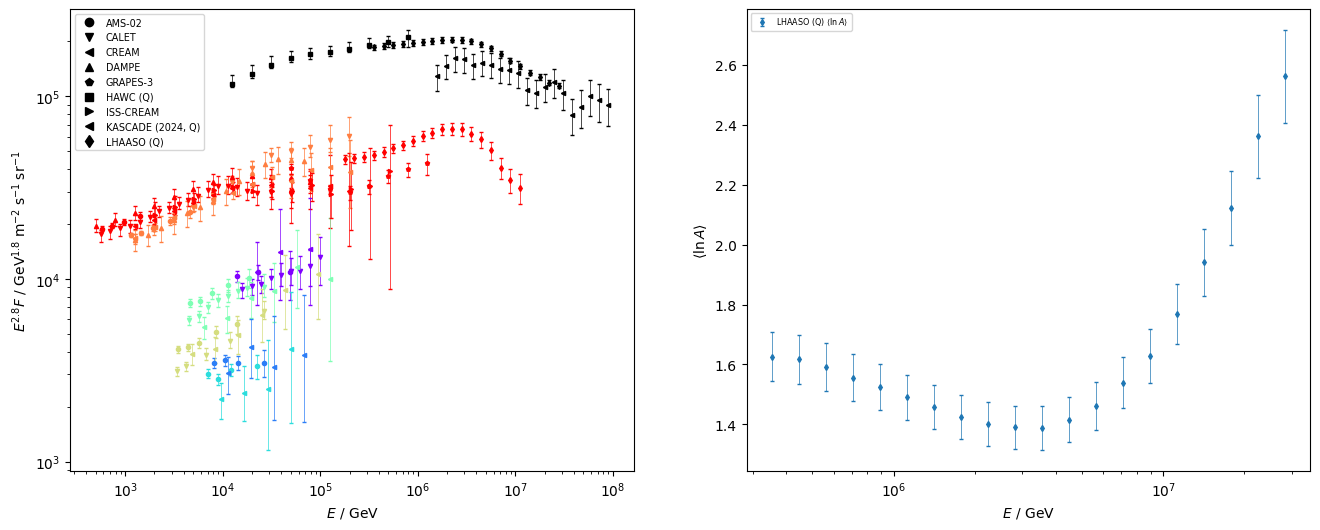

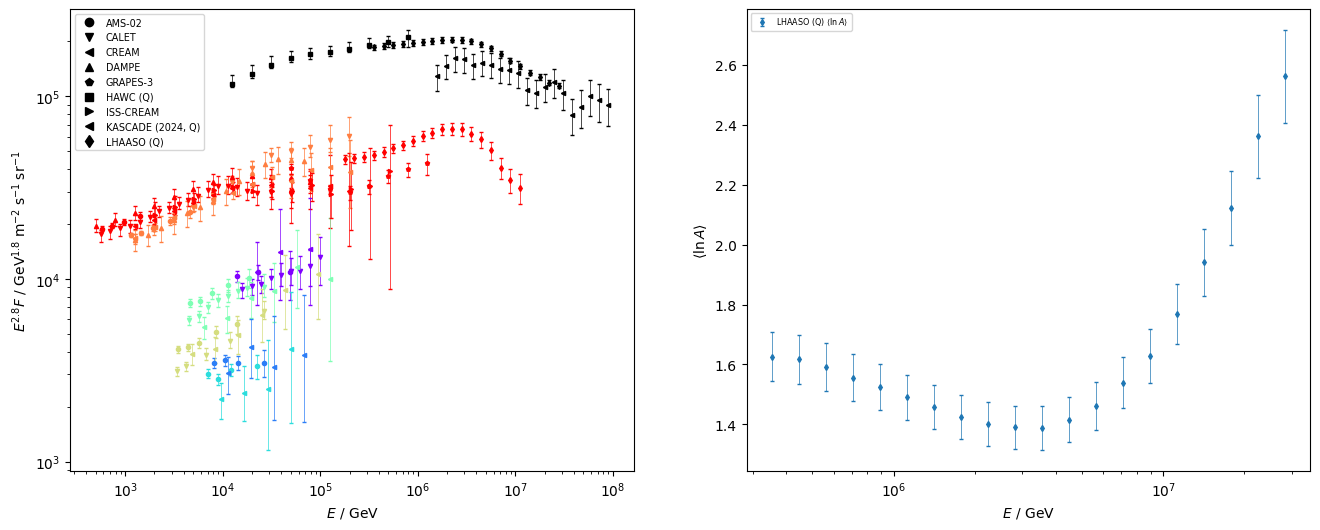

In [21]:
from cr_knee_fit.model_ import Model

FIT_DIR = Path("out/2pop-local")

fc = FitConfig.model_validate_json((FIT_DIR / "config-dump.json").read_text())
theta_sample = np.loadtxt(FIT_DIR / "theta.txt")
theta_best_fit = np.loadtxt(FIT_DIR / "posterior-ml.txt")
fit_data = Data.load(fc.fit_data_config)

model = Model.unpack(theta_best_fit, fc.model)
print(model.energy_shifts)
# .plot_spectra(
#     fit_data,
#     scale=2.8,
# )
fit_data.plot(scale=2.8)

# ppc = plotting.PosteriorPlotConfig(
#     # contours=True,
#     # tricontourf_kwargs_override={"levels": 30},
#     band_cl=0.9,
# )

# fit_data_config = DataConfig(
#     experiments_elements=list(
#         experiments.DIRECT
#         + [
#             experiments.grapes,
#             experiments.lhaaso_qgsjet,
#         ]
#     ),
#     experiments_all_particle=[experiments.hawc, experiments.lhaaso_qgsjet, experiments.kascade_re_qgsjet],
#     experiments_lnA=[],
#     elements=Element.regular(),
# )
# fit_data = Data.load(fit_data_config)

# validation_data_config = DataConfig(
#     experiments_elements=[experiments.kascade_re_qgsjet],
#     experiments_all_particle=[experiments.lhaaso_qgsjet],
#     experiments_lnA=[experiments.lhaaso_qgsjet],
#     elements=[],
# ).excluding(fit_data_config)
# val_data = Data.load(validation_data_config)

# fig, axes = plt.subplot_mosaic(
#     [
#         ["Elements", "Elements"],
#         ["All particle", "lnA"],
#         ["Shifts", "Shifts"],
#     ],
#     figsize=(8, 8),
#     height_ratios=[1, 1, 0.3],
# )

# fig = plotting.plot_everything(
#     plots_config=plotting.PlotsConfig(
#         validation_data_config=validation_data_config,
#         elements=plotting.PosteriorPlotConfig(
#             max_margin_around_data=0.1,
#             population_contribs_best_fit=True,
#         ),
#         all_particle=plotting.PosteriorPlotConfig(
#             max_margin_around_data=1.0,
#             population_contribs_best_fit=True,
#         ),
#         all_particle_elements_contribution=ppc,
#         lnA=ppc,
#         energy_shifts=ppc,
#     ),
#     theta_sample=theta_sample,
#     theta_bestfit=theta_best_fit,
#     model_config=fc.model,
#     spectra_scale=2.8,
#     fit_data=fit_data,
#     validation_data=val_data,
#     axes=axes,
#     legend_ncol=6,
# )

# fig.savefig("export/modified-2pop-alt-model.pdf")